# `Unknown Variance of population` 

## `Here we will use T-test as population Standard Deviation is not given` 

---

---
## Presented by:
### Name: Manuj Kumar Joshi
### Batch: 104
---

### `T-Test Steps`:
---

**Step - 1**:  
- Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
- Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

**Step - 2** :  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

**Step - 3**:
Compute Test Statistic:  

* **If population variance is unknown** $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

**Step - 4**:
Decide significance level $ \alpha $. **Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis**.

**Step - 5.1**:
Apply decision rule:
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

**Step - 5.2**: 
Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

---

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? (Given that the population std is 50) </b>
![](https://res.cloudinary.com/swiggy/image/upload/f_auto,q_auto,fl_lossy/jy7dc9b2kq5erjwvdy95)

In [105]:
import numpy as np
from scipy.stats import t
import statistics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
import matplotlib.pyplot as plt
import statistics as st

### T-score function :

In [106]:
def t_score(sample_size, sample_mean,sample_std, pop_mean):
    numerator=sample_mean - pop_mean
    denominator=sample_std/np.sqrt(sample_size)
    return numerator/denominator

In [107]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
sample_mean=sum(l)/len(l)
sample_mean

465.3

In [108]:
# Defining the sample and population parameters
sample_size = 10
pop_mean = 500
## sample mean an sample std are defined above

In [109]:
var = np.std(l) ** 2    # std of sample is devided by n-1
sample_std = np.sqrt(var * (sample_size) / (sample_size - 1)) 
sample_std 

86.84859110991827

In [110]:
# Calculating the t-score as T-test statistic
t_value = t_score(sample_size,sample_mean,sample_std,pop_mean)
print(t_value)

-1.2634751284446715


 $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

In [111]:
alpha = 1 - 0.95
t_critical = t.ppf(1-alpha/2, df = 9)   # finding critical value
print(t_critical)

2.2621571627409915


In [112]:
p_value=(1-t.cdf(abs(t_value),9)) * 2    # find p value

- #### Alternate Hypothesis (Bold claim):  On average each packet do not contain 500 grams of biryani.
- #### Null Hypothesis (Status Quo):  On average each packet contain 500 grams of biryani.

### Ploting the sampling distribution with rejection regions

Text(465.3, 0.0002, 'x_bar')

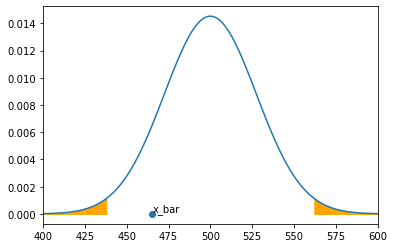

In [113]:
# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std/ (sample_size**0.5)



# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = mean + (-t_critical * std)
t_critical_right = mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0002))


# In this case sample mean falls in the acceptance region
# i.e. here we Failed to reject the Null Hypothesis

In [114]:
print('Population mean:',mean)
print('Sample_mean:',sample_mean)
print('Left critical:',t_critical_left)
print('Right Critical:',t_critical_right)

Population mean: 500
Sample_mean: 465.3
Left critical: 437.8722605772688
Right Critical: 562.1277394227312


### Conclusion using T-test

In [115]:
if(t_value > t_critical):  # 2 tailed t test
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Accept Null Hypothesis


### Conclusion using p-test

In [116]:
print("p_value = ", p_value)   # 2 tailed

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Failed to Reject Null Hypothesis")

p_value =  0.23816470585327654
Accept Null Hypothesis


### Finding: `On average each packet contain 500 grams of biryani`

---

<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? ~(Given that the population std is 0.5)~ </b>

![](https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5f5afcbb8de14d399113ebc7%2F4-Simple-Ways-Businesses-Can-Use-Natural-Language-Processing%2F960x0.jpg%3Ffit%3Dscale)

---


In [117]:
l = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

sum(l)/len(l)

4.25

In [118]:
# Defining the sample and population parameters
sample_size = 20
sample_mean = 4.25
pop_mean = 4

In [119]:
var = np.std(l) ** 2    # std of sample is devided by n-1
sample_std = np.sqrt(var * (sample_size) / (sample_size - 1))
sample_std

0.8506963092234007

In [120]:
# Calculating the t-score
t_value = t_score(sample_size,sample_mean,sample_std,pop_mean)
print(t_value)

1.3142574813455419


In [121]:
alpha = 1 - 0.95    
t_critical = t.ppf(1-alpha, 19)   # finding critical value
print(t_critical)

1.729132811521367


In [122]:
p_value=(1-t.cdf(abs(t_value),19))    # find p value
p_value

0.10220287084734081

- #### Alternate Hypothesis (Bold claim):  Average rating given by the users is greater than 4 on a scale of 1 to 5.
- #### Null Hypothesis (Status Quo): Average rating given by the users are not greater then equal to 4 on a scale of 1 to 5.

### Ploting the sampling distribution with rejection regions

Text(4.25, 0.1, 'x_bar')

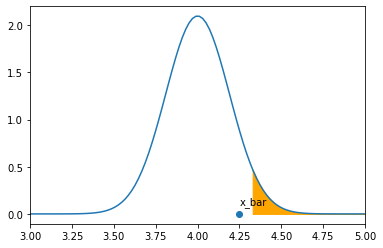

In [123]:
# Defining the x minimum and x maximum
x_min = 3
x_max = 5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std/ (sample_size**0.5)    # standard eror



# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the acceptance region
# i.e. Failed to Reject the Null Hypothesis

In [124]:
print('Population mean:',mean)
print('Sample_mean:',sample_mean)
print('Right Critical:',t_critical_right)

Population mean: 4
Sample_mean: 4.25
Right Critical: 4.328918198310554


### Conclusion using t-test

In [125]:
if(t_value > t_critical):   # right tailed test
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

Accept Null Hypothsis


### Conclusion using p-test

In [126]:
print("p_value = ", p_value)   # 1 tailed

if(p_value < alpha):
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

p_value =  0.10220287084734081
Accept Null Hypothesis


### Finding:`Average rating given by the users is not greater than 4 on a scale of 1 to 5`

---

<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? (~Given that the population std is 1~)</b>

![](https://images.livemint.com/img/2021/02/22/1600x900/safari-overview-desktop-banner_1613971729141_1613971744902.jpg)

---


In [127]:
l = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sum(l)/len(l)

15.098999999999998

In [128]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15

In [129]:
var = np.std(l) ** 2   # sample size n
sample_std = np.sqrt(var * (sample_size) / (sample_size - 1)) # n-1
sample_std

1.0253671999517255

In [130]:
# Calculating the t-score
t_value = t_score(sample_size,sample_mean,sample_std,pop_mean)
print(t_value)

0.4361496988795929


In [131]:
alpha = 1 - 0.95    
t_critical = t.ppf(1-alpha, df = 19)   # finding critical value
print(t_critical)

1.729132811521367


In [132]:
p_value=(1-t.cdf(abs(t_value),19))    # find p value
p_value

0.33382179395277345

- #### Alternate Hypothesis (Bold claim):  on average the SUV's mileage is at least 15 km/litre
- #### Null Hypothesis (Status Quo): On average the SUV's mileage is greater than equal to 15 km/litre

### Ploting the sampling distribution with rejection regions

Text(15.1, 0.1, 'x_bar')

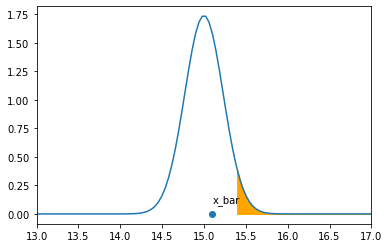

In [133]:
x_min = 13
x_max = 17

mean = pop_mean
std = sample_std / (sample_size**0.5)   # standard error

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the acceptance region
# i.e. Fail to Reject the Null Hypothesis

### Conclusion using T-test

In [134]:
if(np.abs(t_value) > t_critical):   # right tailed t test
    print("Reject Null Hypothesis") 
else:
    print("Fail to Reject Null Hypothesis")

Accept Null Hypothesis


### Conclusion using p-test

In [135]:
print("p_value = ", p_value)    # 1 tailed 

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print('Fail to Reject Null Hypothesis')

p_value =  0.33382179395277345
Accept Null Hypothesis


### `On average the SUV's mileage is at least 15 km/litre`

---

<b>Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? (~Based on past data you know that the std is 10 ms~)</b>
![](https://www.bbva.com/wp-content/uploads/2018/01/inteligencia-artificial-ai-cerebro-tecnologia-innovacion-BBVA-1024x431.jpg)




In [136]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100

In [137]:
l=np.random.random_integers(90,110,100)  # created sample
l

array([108, 108, 108, 102,  98, 102, 109,  98, 103, 110,  90,  94, 109,
       109, 106,  92, 108, 104, 107,  99,  96, 105,  96,  98, 108, 106,
        96,  90, 106, 103, 105, 109, 101, 109,  99,  92,  97,  99, 109,
       104,  98,  98, 107, 105,  95, 110,  98, 103, 100,  96, 105, 101,
        92,  97,  90,  92,  94, 100, 102,  94,  97,  94,  96,  96, 107,
       101, 108, 107,  97, 105,  91, 101, 105, 106,  96, 104, 105,  98,
       109,  99, 110,  94,  96,  99, 110, 101, 110, 110,  91,  92,  96,
        94, 100, 106, 102, 108, 110,  92,  95,  98])

In [138]:
var = np.std(l) ** 2    # std of sample is devided by n-1
sample_std = np.sqrt(var * (sample_size) / (sample_size - 1))
sample_std

6.014082799495856

In [139]:
# Calculating the t-score
t_value = t_score(sample_size,sample_mean,sample_std,pop_mean)
print(t_value)

-4.156909845354254


In [140]:
alpha = 1 - 0.95    # type 1 error rate
t_critical = t.ppf(1-alpha, df = 19)   # finding critical value
print(t_critical)

1.729132811521367


In [141]:
p_value=(1-t.cdf(abs(t_value),19))    # find p value
p_value

0.00026772987479761756

- #### Alternate Hypothesis (Bold claim):  On average it takes less than 100 ms to predict for any future datapoint
- #### Null Hypothesis (Status Quo): On average it takes greater than equal to 100 ms to predict for any future datapoint

Text(97.5, 0.02, 'x_bar')

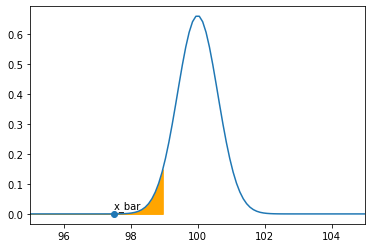

In [142]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / (sample_size**0.5)   # standard error


x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

### Conclusion by T-test

In [143]:
if(t_value < - t_critical):   # Left tailed t test
    print("Reject Null Hypothesis") 
else:
    print("Fail to Reject Null Hypothesis")

Accept Alternate Hypothesis


### Conclusion by p-test

In [144]:
print("p_value = ", p_value)    # 1 tailed 

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_value =  0.00026772987479761756
Accept Alternate Hypothesis


#### `New Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint`

# Hypothesis Testing Project Completed -----------------------------